## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import pymc3 as pm

In [6]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p', 0.40, 0.80)
    
    y = pm.Binomial('y', n=n, p=p, observed=k)
    
    trace = pm.sample(10000)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 16 seconds.


In [7]:
pm.summary(trace)

/opt/miniconda3/envs/lynda-pset/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.518,0.699,0.0,0.0,15196.0,15192.0,15183.0,23168.0,1.0


/opt/miniconda3/envs/lynda-pset/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

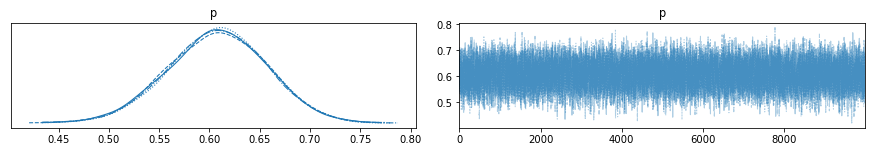

In [8]:
pm.traceplot(trace)

In [9]:
gdata = pd.read_csv('gapminder.csv').query('year == 1985')

In [10]:
gdata.sort_values('age5_surviving', inplace=True)


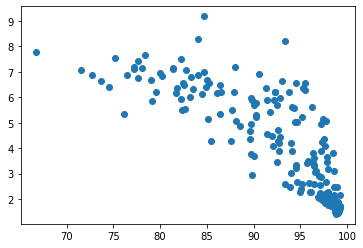

In [11]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [13]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept', 5, 15)
    
    slope = pm.Uniform('slope', -1, 1)
    
    babies = pm.Normal('babies', 
                       mu=intercept + slope * (gdata['age5_surviving'] - 65),
                       sd=1, 
                       observed=gdata['babies_per_woman'])
    
    trace = pm.sample(1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.8902403822253312, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [14]:
pm.summary(trace)

/opt/miniconda3/envs/lynda-pset/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,10.203,0.288,9.667,10.735,0.01,0.007,760.0,759.0,759.0,812.0,1.01
slope,-0.220,0.010,-0.241,-0.202,0.00,0.000,764.0,763.0,764.0,783.0,1.00


/opt/miniconda3/envs/lynda-pset/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>]], dtype=object)

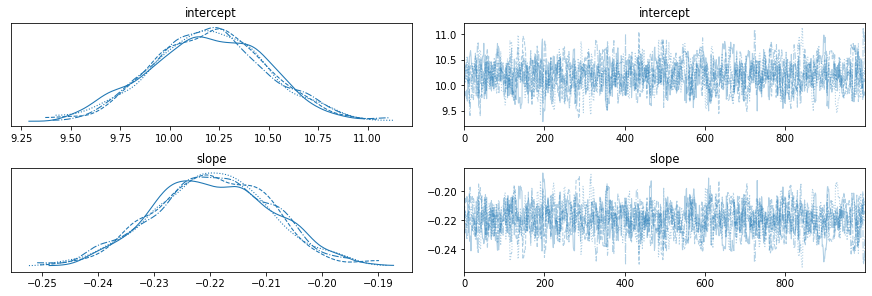

In [15]:
pm.traceplot(trace)

In [16]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

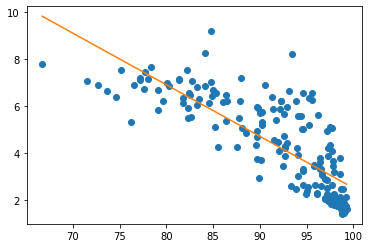

In [17]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'], babies, 'C1')

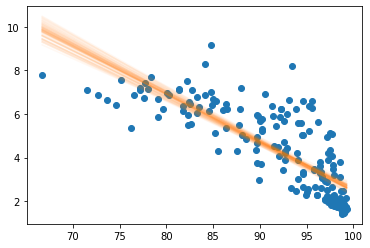

In [18]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
for i, intercept, slope in zip(range(100), trace['intercept'][::50], trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'], babies, 'C1', alpha=0.05)